# Improve Model Performance with Synthetic Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_data = pd.read_csv("stockdata.csv")

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   beta                     171 non-null    float64
 1   bookValue                171 non-null    float64
 2   debtToEquity             171 non-null    float64
 3   dividendRate             171 non-null    float64
 4   dividendYield            171 non-null    float64
 5   earningsGrowth           171 non-null    float64
 6   ebitda                   171 non-null    float64
 7   ebitdaMargins            171 non-null    float64
 8   enterpriseToEbitda       171 non-null    float64
 9   enterpriseToRevenue      171 non-null    float64
 10  grossMargins             171 non-null    float64
 11  heldPercentInsiders      171 non-null    float64
 12  heldPercentInstitutions  171 non-null    float64
 13  operatingMargins         171 non-null    float64
 14  payoutRatio              1

### Model Building

In [4]:
## identify inputs and target columns.
input_cols, target_col_reg = stock_data.columns[:-1], stock_data.columns[-1]
inputs_df, targets_reg = stock_data[input_cols].copy(), stock_data[target_col_reg].copy()

In [5]:
## identify numeric and categorical columns.
numeric_cols = inputs_df.columns.tolist()
## scale numeric columns.
scaler = RobustScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [6]:
X = inputs_df
y = targets_reg

In [7]:
# Splitting data into a training and holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=777)

In [8]:
def reg_metrics(X_train, X_test, y_train, y_test ,model):
        ##  fit our model to the training data.
        model.fit(X_train, y_train)   
        train_preds = model.predict(X_train)
        # Calculate Train RMSE and R2
        print("Training Scores")
        print("------------------------------------------------------")
        print("Train RMSE:", np.sqrt(mean_squared_error(y_train, train_preds)))
        print("Train MSE:", mean_squared_error(y_train, train_preds))
        print("Train MAE:", mean_absolute_error(y_train, train_preds))
        print("Train R2:", r2_score(y_train, train_preds))
        print("------------------------------------------------------")
        test_preds = model.predict(X_test)
        #Calculate Test RMSE and R2
        print("\nTesting Scores")
        print("------------------------------------------------------")
        print("Test RMSE:", np.sqrt(mean_squared_error(y_test, test_preds))) 
        print("Test MSE:", mean_squared_error(y_test, test_preds))
        print("Test MAE:", mean_absolute_error(y_test, test_preds)) 
        print("Test R2:", r2_score(y_test, test_preds))

In [9]:
reg_knn = KNeighborsRegressor()
reg_metrics(X_train, X_test, y_train, y_test ,reg_knn)

Training Scores
------------------------------------------------------
Train RMSE: 0.19440074604611807
Train MSE: 0.03779165006328729
Train MAE: 0.1542904866199343
Train R2: 0.26274366354045253
------------------------------------------------------

Testing Scores
------------------------------------------------------
Test RMSE: 0.22708817066023426
Test MSE: 0.05156903725381168
Test MAE: 0.17562583940459756
Test R2: -0.4237073256618793


In [10]:
reg_rf = RandomForestRegressor(random_state=0)
reg_metrics(X_train, X_test, y_train, y_test ,reg_rf)

Training Scores
------------------------------------------------------
Train RMSE: 0.08560145163265759
Train MSE: 0.007327608521618216
Train MAE: 0.06900823227877373
Train R2: 0.8570497502858152
------------------------------------------------------

Testing Scores
------------------------------------------------------
Test RMSE: 0.1974323635268837
Test MSE: 0.03897953816781156
Test MAE: 0.14080101027479178
Test R2: -0.07613903605168137


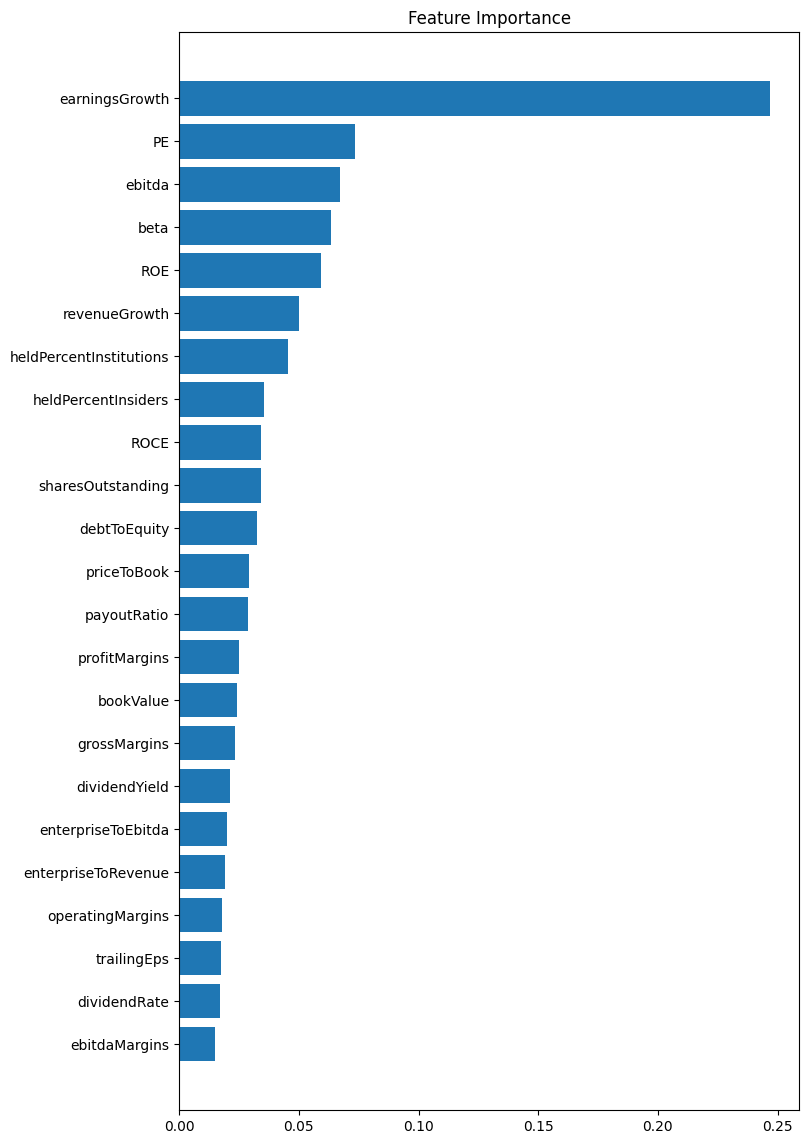

In [11]:
# Get feature importances from the best estimator
#importances = best_rf.feature_importances_
# Let's look at the feature importances for this model
feature_importance = reg_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 14))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

**With only 171 records training a regression model doesn't provide better result. So lets increase the number of data rows with bootstrapping.**

In [12]:
# Generate synthetic data using bootstrapping
n_samples = 1000  # Number of synthetic samples to generate
indices = np.random.choice(stock_data.index, size=n_samples, replace=True)
synthetic_features_bootstrap = stock_data.loc[indices].reset_index(drop=True)

# Print synthetic data
print("Synthetic Data (Bootstrapping):")
synthetic_features_bootstrap.info()

Synthetic Data (Bootstrapping):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   beta                     1000 non-null   float64
 1   bookValue                1000 non-null   float64
 2   debtToEquity             1000 non-null   float64
 3   dividendRate             1000 non-null   float64
 4   dividendYield            1000 non-null   float64
 5   earningsGrowth           1000 non-null   float64
 6   ebitda                   1000 non-null   float64
 7   ebitdaMargins            1000 non-null   float64
 8   enterpriseToEbitda       1000 non-null   float64
 9   enterpriseToRevenue      1000 non-null   float64
 10  grossMargins             1000 non-null   float64
 11  heldPercentInsiders      1000 non-null   float64
 12  heldPercentInstitutions  1000 non-null   float64
 13  operatingMargins         1000 non-null   float6

In [13]:
## identify inputs and target columns.
input_cols, target_col_reg = synthetic_features_bootstrap.columns[:-1], synthetic_features_bootstrap.columns[-1]
inputs_synthetic_df, targets_synthetic_reg = synthetic_features_bootstrap[input_cols].copy(), synthetic_features_bootstrap[target_col_reg].copy()

In [14]:
## identify numeric and categorical columns.
numeric_cols = inputs_synthetic_df.columns.tolist()
## scale numeric columns.
scaler = RobustScaler().fit(inputs_synthetic_df[numeric_cols])
inputs_synthetic_df[numeric_cols] = scaler.transform(inputs_synthetic_df[numeric_cols])

In [15]:
X_new = inputs_synthetic_df
y_reg = targets_synthetic_reg

In [16]:
# Splitting data into a training and holdout set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_reg, test_size=0.2, random_state=777)

In [17]:
reg_kn = KNeighborsRegressor(n_neighbors=5)
reg_metrics(X_train, X_test, y_train, y_test ,reg_kn)

Training Scores
------------------------------------------------------
Train RMSE: 0.06092632025133694
Train MSE: 0.00371201649936847
Train MAE: 0.024980112485026122
Train R2: 0.9194764058204131
------------------------------------------------------

Testing Scores
------------------------------------------------------
Test RMSE: 0.07399347849296684
Test MSE: 0.005475034859489145
Test MAE: 0.03348773102931852
Test R2: 0.8738661294560249


In [18]:
reg_rf = RandomForestRegressor(random_state=0)
reg_metrics(X_train, X_test, y_train, y_test ,reg_rf)

Training Scores
------------------------------------------------------
Train RMSE: 0.010211646796740635
Train MSE: 0.00010427773030138326
Train MAE: 0.0035480320674936994
Train R2: 0.9977379363377868
------------------------------------------------------

Testing Scores
------------------------------------------------------
Test RMSE: 0.017659865234272206
Test MSE: 0.00031187084009265615
Test MAE: 0.0057868905799676055
Test R2: 0.9928151185918918


#### Conclusion

**Financial markets are complex and influenced by numerous unforeseen factors, making prediction inherently challenging.
Stock fundamentals can provide valuable insights, forecasting stock returns involves complexities and uncertainties, and results should be interpreted cautiously.**

--------------------------------------------------------------------------------------------------------------------------------